In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 生物学参数
seed_production_per_plant = 1500  # 每株平均产生的种子数
flower_to_seed_days = 14  # 开花到种子成熟的天数
germination_days = 5  # 萌发所需天数
optimal_temp = (10, 20)  # 最适宜的温度范围
max_wind_dispersal = 100  # 风力最大扩散距离（米）


In [2]:
# 环境条件参数
num_days = 730  # 模拟天数 (两年)
temps = np.random.uniform(low=-5, high=30, size=num_days)  # 模拟的每日温度
winds = np.random.uniform(low=0, high=5, size=num_days)  # 模拟的每日风速
humidity = np.random.uniform(low=30, high=100, size=num_days)  # 模拟的每日湿度


In [3]:
# 种子散布模型
def disperse_seeds(winds, num_seeds, max_dispersal):
    directions = np.random.uniform(0, 2*np.pi, num_seeds)  # 随机散布方向
    distances = np.random.normal(loc=0, scale=winds * max_dispersal, size=num_seeds)  # 风速影响的散布距离
    x_positions = distances * np.cos(directions)
    y_positions = distances * np.sin(directions)
    return x_positions, y_positions

# 种子存活与萌发
def seed_germination(temps, humidity, germination_days, optimal_temp):
    survival_rate = np.clip((temps - optimal_temp[0]) / (optimal_temp[1] - optimal_temp[0]), 0, 1)
    germinated = (temps > optimal_temp[0]) & (temps < optimal_temp[1]) & (humidity > 50)
    return np.sum(germinated[:germination_days]) * survival_rate[:germination_days]


In [4]:
# 种群扩散模拟
population = np.zeros((num_days, 2))  # 记录种群中心的位置
population_density = np.zeros((1000, 1000))  # 记录种群密度的网格
initial_plants = 1
x, y = 500, 500  # 初始种群中心位置

# Seed dispersal simulation correction
for day in range(num_days):
    if day % flower_to_seed_days == 0 and temps[day] > 5:  # Assuming seeds can mature and disperse above 5 degrees
        num_seeds = initial_plants * seed_production_per_plant
        wind = winds[day]
        x_offsets, y_offsets = disperse_seeds(wind, num_seeds, max_wind_dispersal)
        for dx, dy in zip(x_offsets, y_offsets):
            # Correcting here to ensure indices are integers
            nx, ny = int(x + dx), int(y + dy)
            if 0 <= nx < 1000 and 0 <= ny < 1000:
                population_density[nx, ny] += 1

    # Updating population center, simplified to the highest density point
    max_density_idx = np.argmax(population_density)  # This returns a linear index
    x, y = max_density_idx % 1000, max_density_idx // 1000
    initial_plants = population_density[x, y]

    # Recalculate plant numbers each growing season
    if day % 365 == 0:
        initial_plants = np.sum(population_density) * seed_germination(temps[day:day+germination_days], humidity[day:day+germination_days], germination_days, optimal_temp)


# 可视化结果
plt.imshow(np.log1p(population_density), cmap='Greens')
plt.colorbar()
plt.title('Log of Dandelion Population Density After Two Years')
plt.show()


TypeError: expected a sequence of integers or a single integer, got '42000.0'

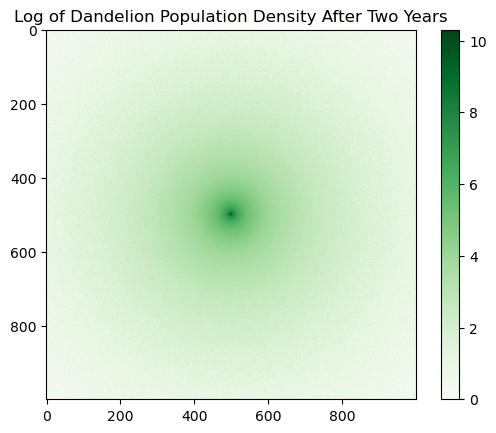

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 假设这些函数已经定义
def disperse_seeds(wind, num_seeds, max_dispersal):
    directions = np.random.uniform(0, 2*np.pi, num_seeds)
    distances = np.random.normal(loc=0, scale=wind * max_dispersal, size=num_seeds)
    x_positions = distances * np.cos(directions)
    y_positions = distances * np.sin(directions)
    return x_positions, y_positions

def seed_germination(temp, humidity, days, optimal_temp):
    survival_rate = np.clip((temp - optimal_temp[0]) / (optimal_temp[1] - optimal_temp[0]), 0, 1)
    germinated = np.all([temp > optimal_temp[0], temp < optimal_temp[1], humidity > 50], axis=0)
    return np.sum(germinated) * survival_rate.mean()

# 参数设置
num_days = 730
initial_plants = 1
x, y = 500, 500
flower_to_seed_days = 14
seed_production_per_plant = 1500
max_wind_dispersal = 100
winds = np.random.uniform(0, 5, num_days)
temps = np.random.uniform(-5, 30, num_days)
humidity = np.random.uniform(30, 100, num_days)
optimal_temp = (10, 20)
population_density = np.zeros((1000, 1000))

for day in range(num_days):
    if day % flower_to_seed_days == 0 and temps[day] > 5:
        num_seeds = initial_plants * seed_production_per_plant
        x_offsets, y_offsets = disperse_seeds(winds[day], num_seeds, max_wind_dispersal)
        for dx, dy in zip(x_offsets, y_offsets):
            nx, ny = int(x + dx), int(y + dy)
            if 0 <= nx < 1000 and 0 <= ny < 1000:
                population_density[nx, ny] += 1
    if day % 365 == 0:  # 每年重新评估
        initial_plants = int(np.sum(population_density) * seed_germination(temps[day], humidity[day], 30, optimal_temp))

plt.imshow(np.log1p(population_density), cmap='Greens')
plt.colorbar()
plt.title('Log of Dandelion Population Density After Two Years')
plt.show()


In [5]:
import numpy as np

def disperse_seeds(wind, num_seeds, max_dispersal):
    directions = np.random.uniform(0, 2*np.pi, num_seeds)
    distances = np.random.normal(loc=0, scale=wind * max_dispersal, size=num_seeds)
    x_positions = distances * np.cos(directions)
    y_positions = distances * np.sin(directions)
    return x_positions, y_positions

def seed_germination(temp, humidity, days, optimal_temp):
    survival_rate = np.clip((temp - optimal_temp[0]) / (optimal_temp[1] - optimal_temp[0]), 0, 1)
    germinated = temp > optimal_temp[0] and temp < optimal_temp[1] and humidity > 50
    return germinated * survival_rate

# 初始化变量
num_days = 730
population_density = np.zeros((1000, 1000))
initial_plants = 1
x, y = 500, 500
flower_to_seed_days = 14
seed_production_per_plant = 1500
max_wind_dispersal = 100
winds = np.random.uniform(0, 5, num_days)
temps = np.random.uniform(-5, 30, num_days)
humidity = np.random.uniform(30, 100, num_days)
optimal_temp = (10, 20)

# 存储快照
output_times_months = [1, 3, 6, 12, 18, 24]
output_times_days = [30 * month for month in output_times_months]
population_snapshots = {day: None for day in output_times_days}

for day in range(1, num_days + 1):
    if day % flower_to_seed_days == 0 and temps[day - 1] > 5:
        num_seeds = initial_plants * seed_production_per_plant
        wind = winds[day - 1]
        x_offsets, y_offsets = disperse_seeds(wind, num_seeds, max_wind_dispersal)
        for dx, dy in zip(x_offsets, y_offsets):
            nx, ny = int(round(x + dx)), int(round(y + dy))
            if 0 <= nx < 1000 and 0 <= ny < 1000:
                population_density[nx, ny] += 1

    if day % 365 == 0:
        initial_plants = int(np.sum(population_density) * seed_germination(temps[day - 1], humidity[day - 1], 30, optimal_temp))

    if day in output_times_days:
        population_snapshots[day] = population_density.copy()


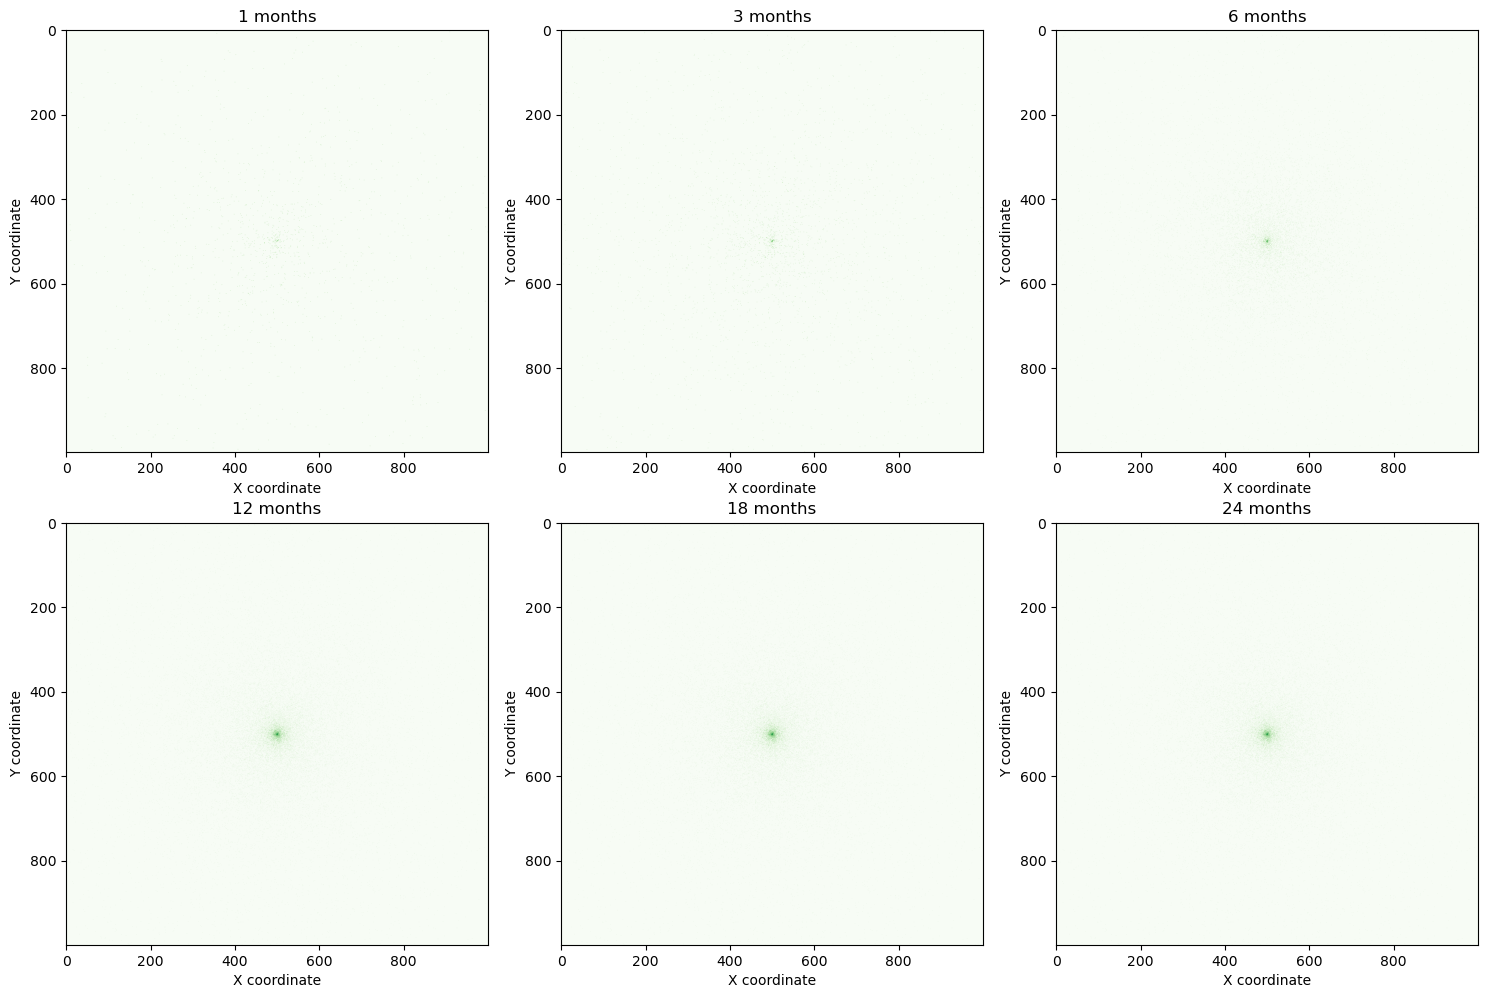

In [6]:
# 可视化特定时间点的种群密度
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for i, days in enumerate(sorted(population_snapshots.keys())):
    ax = axes[i]
    density = population_snapshots[days]
    ax.imshow(np.log1p(density), cmap='Greens')
    ax.set_title(f"{output_times_months[i]} months")
    ax.set_xlabel('X coordinate')
    ax.set_ylabel('Y coordinate')
plt.tight_layout()
plt.show()
